In [1]:
import os
import numpy as np
import simulate_nu_g
import astropy
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib
import healpy as hp
import time

font = {'size'   : 20}
matplotlib.rc('font', **font)


Matplotlib created a temporary config/cache directory at /var/folders/xz/s2qzbf4106788cpvlfxpzj240000gn/T/matplotlib-crtnv7w0 because the default path (/Users/abhishek/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Saving output toe file:  ./

 Please Note that the output will be saved as:
Galactocentric Coords (r,phi,z) then Galactic Coords (l deg,b deg,d kpc)
--- 2.3062238693237305 seconds ---


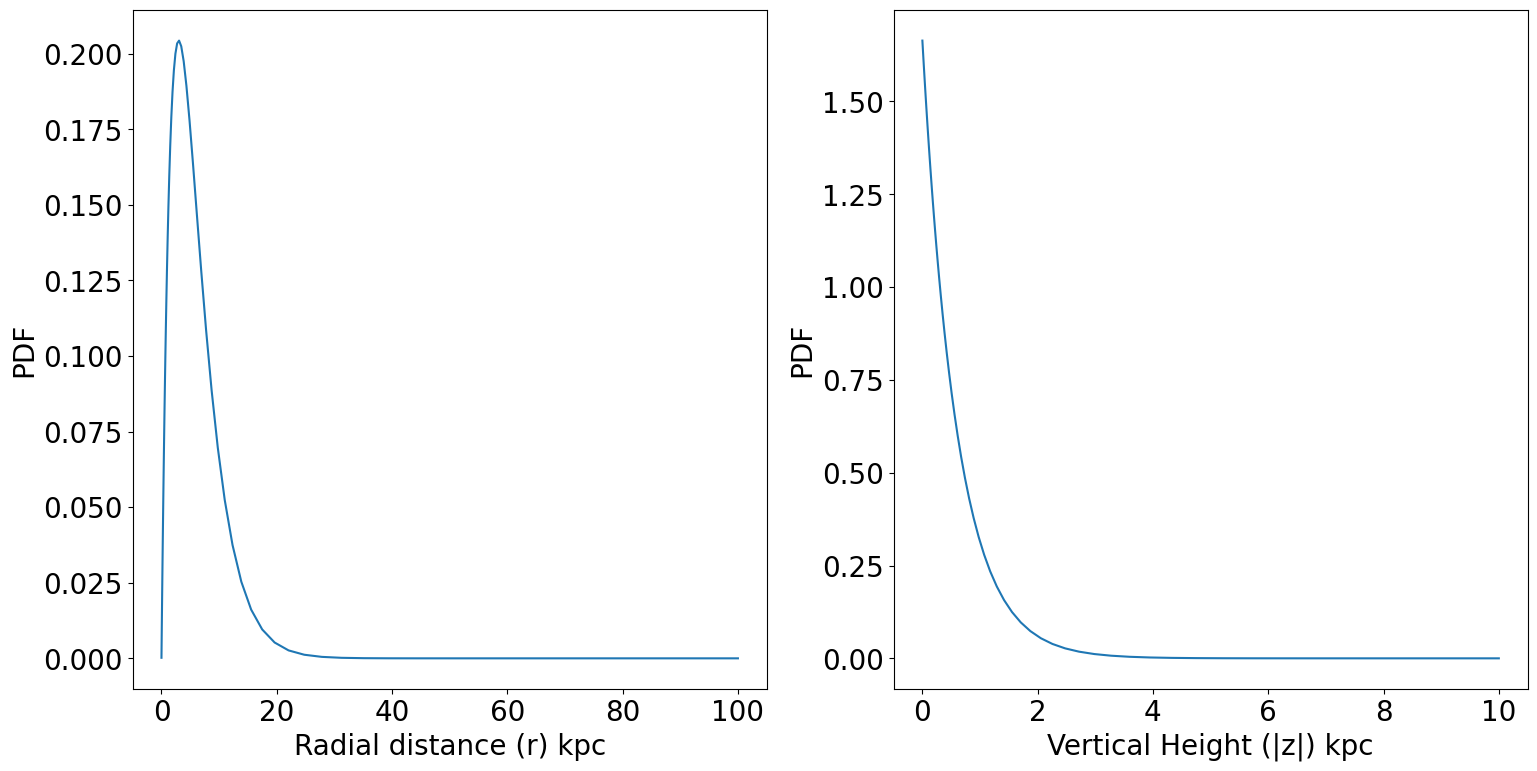

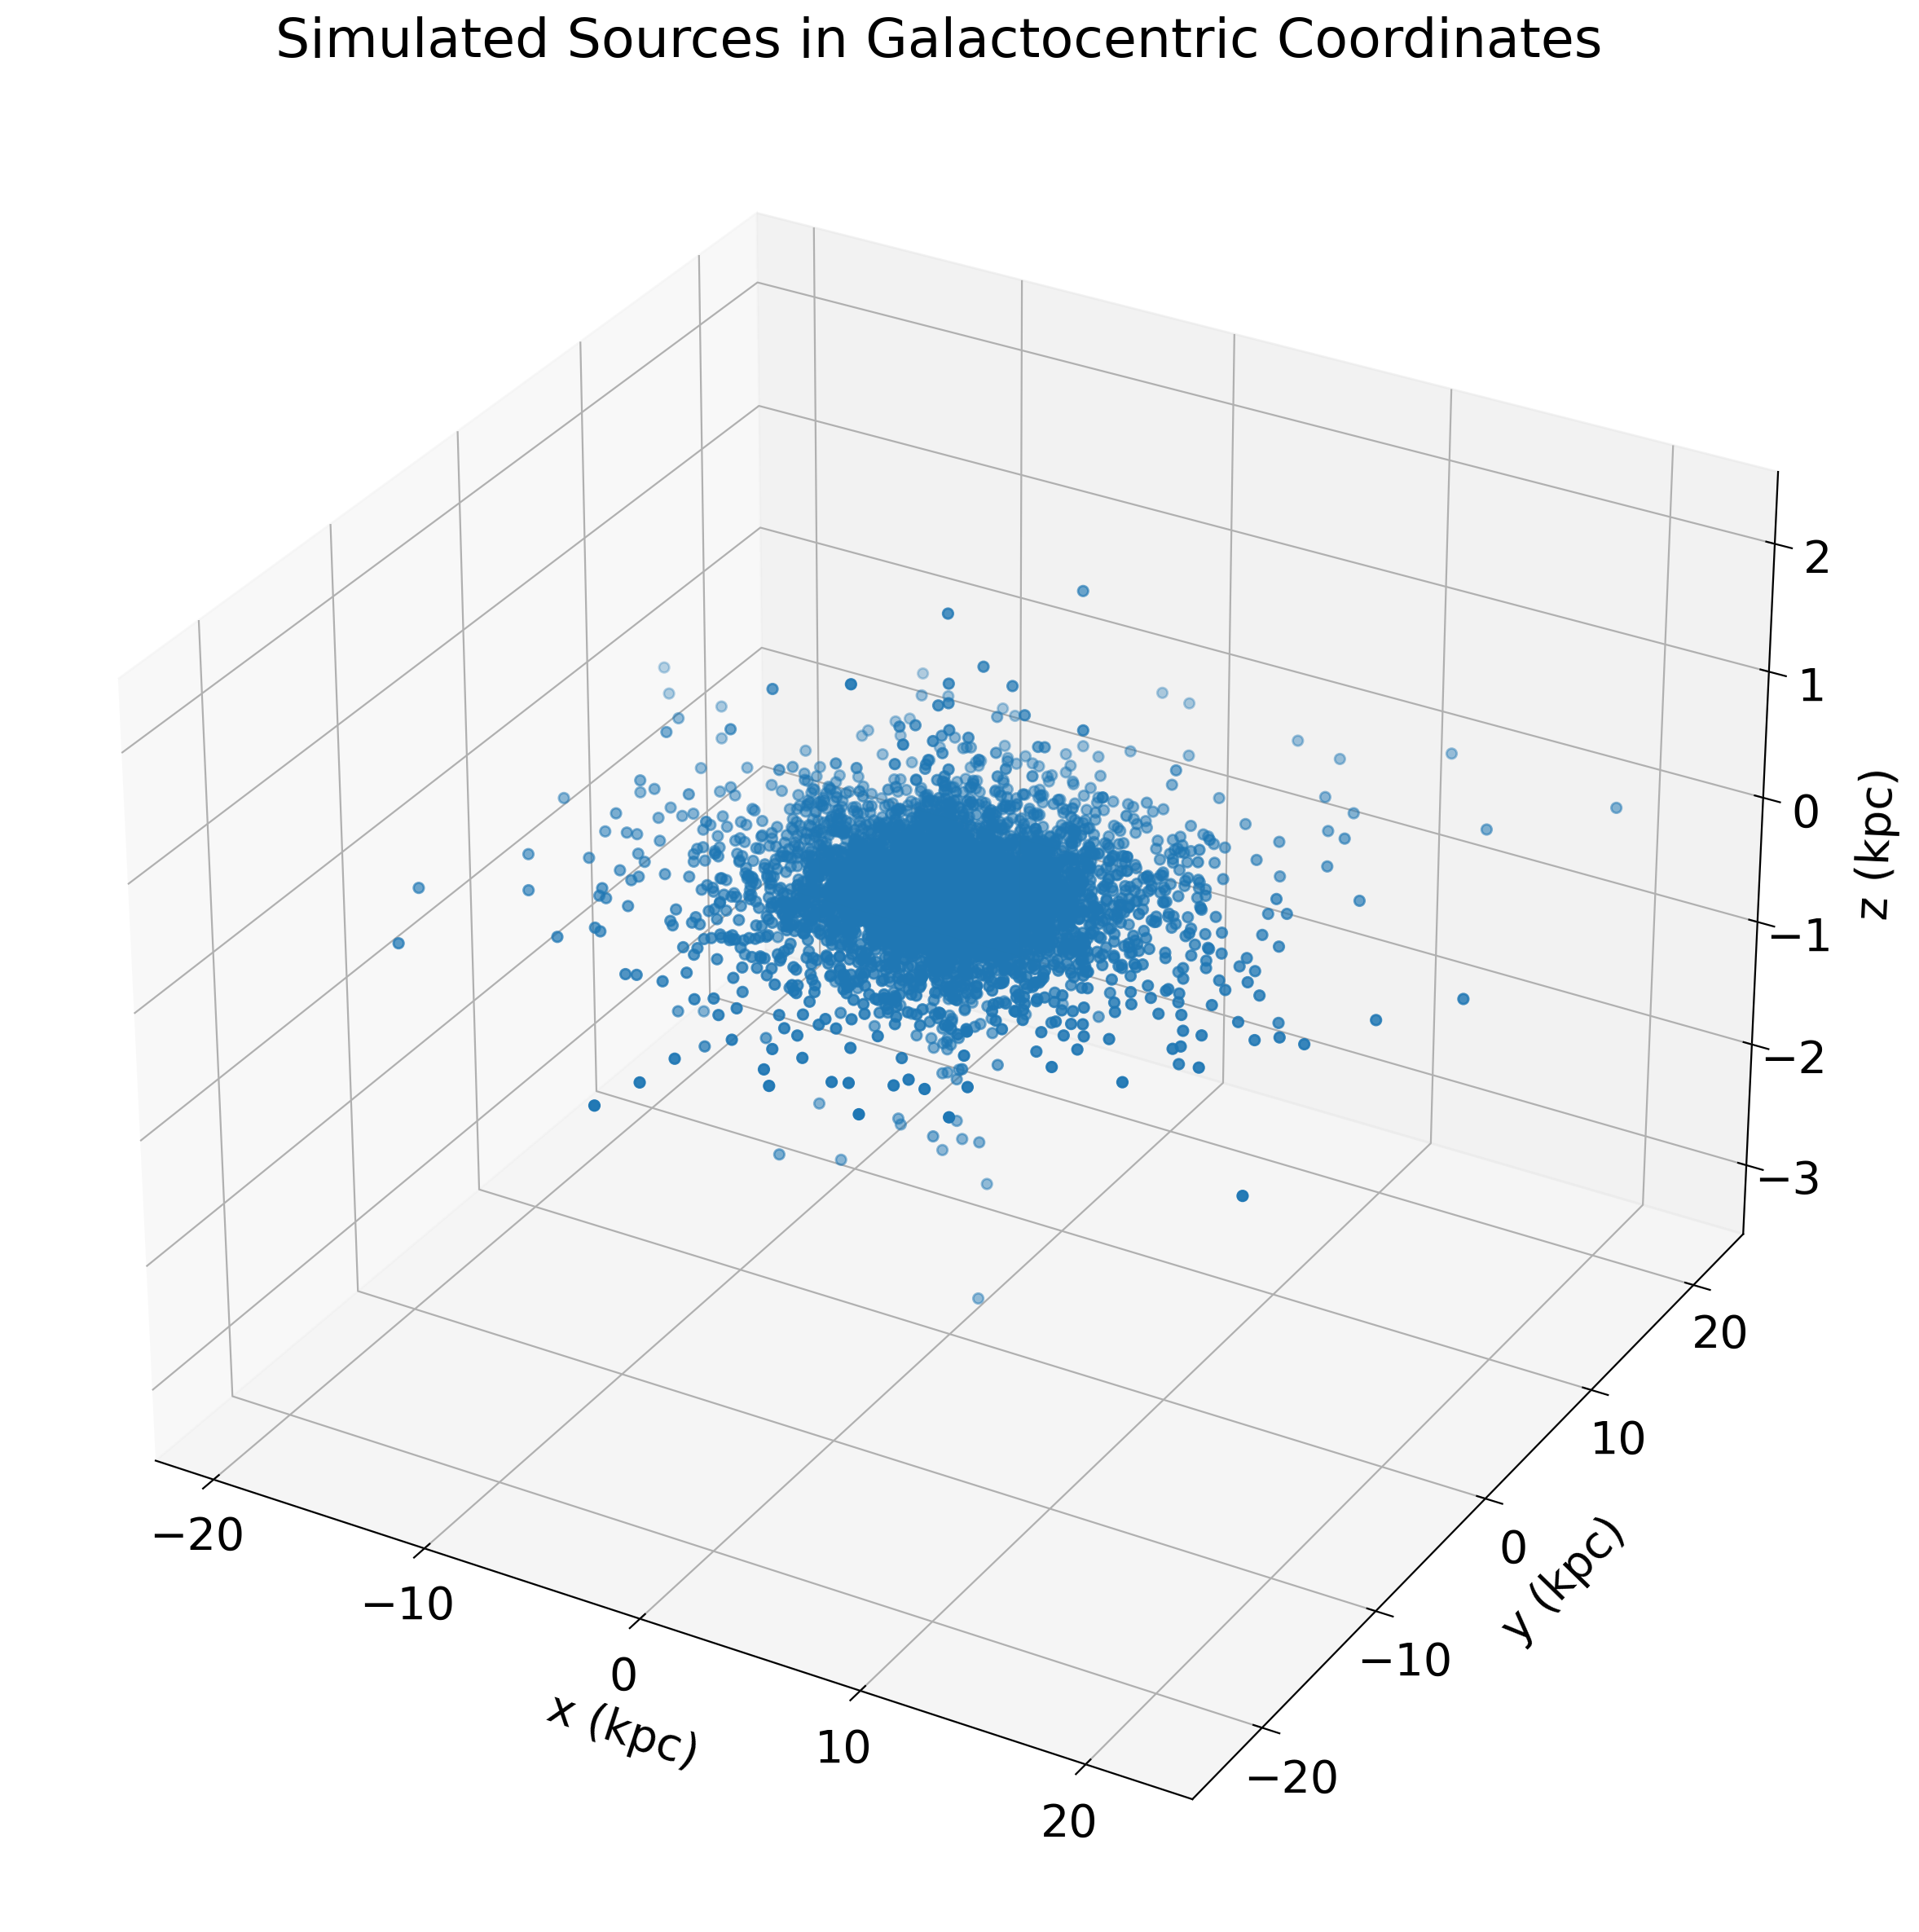

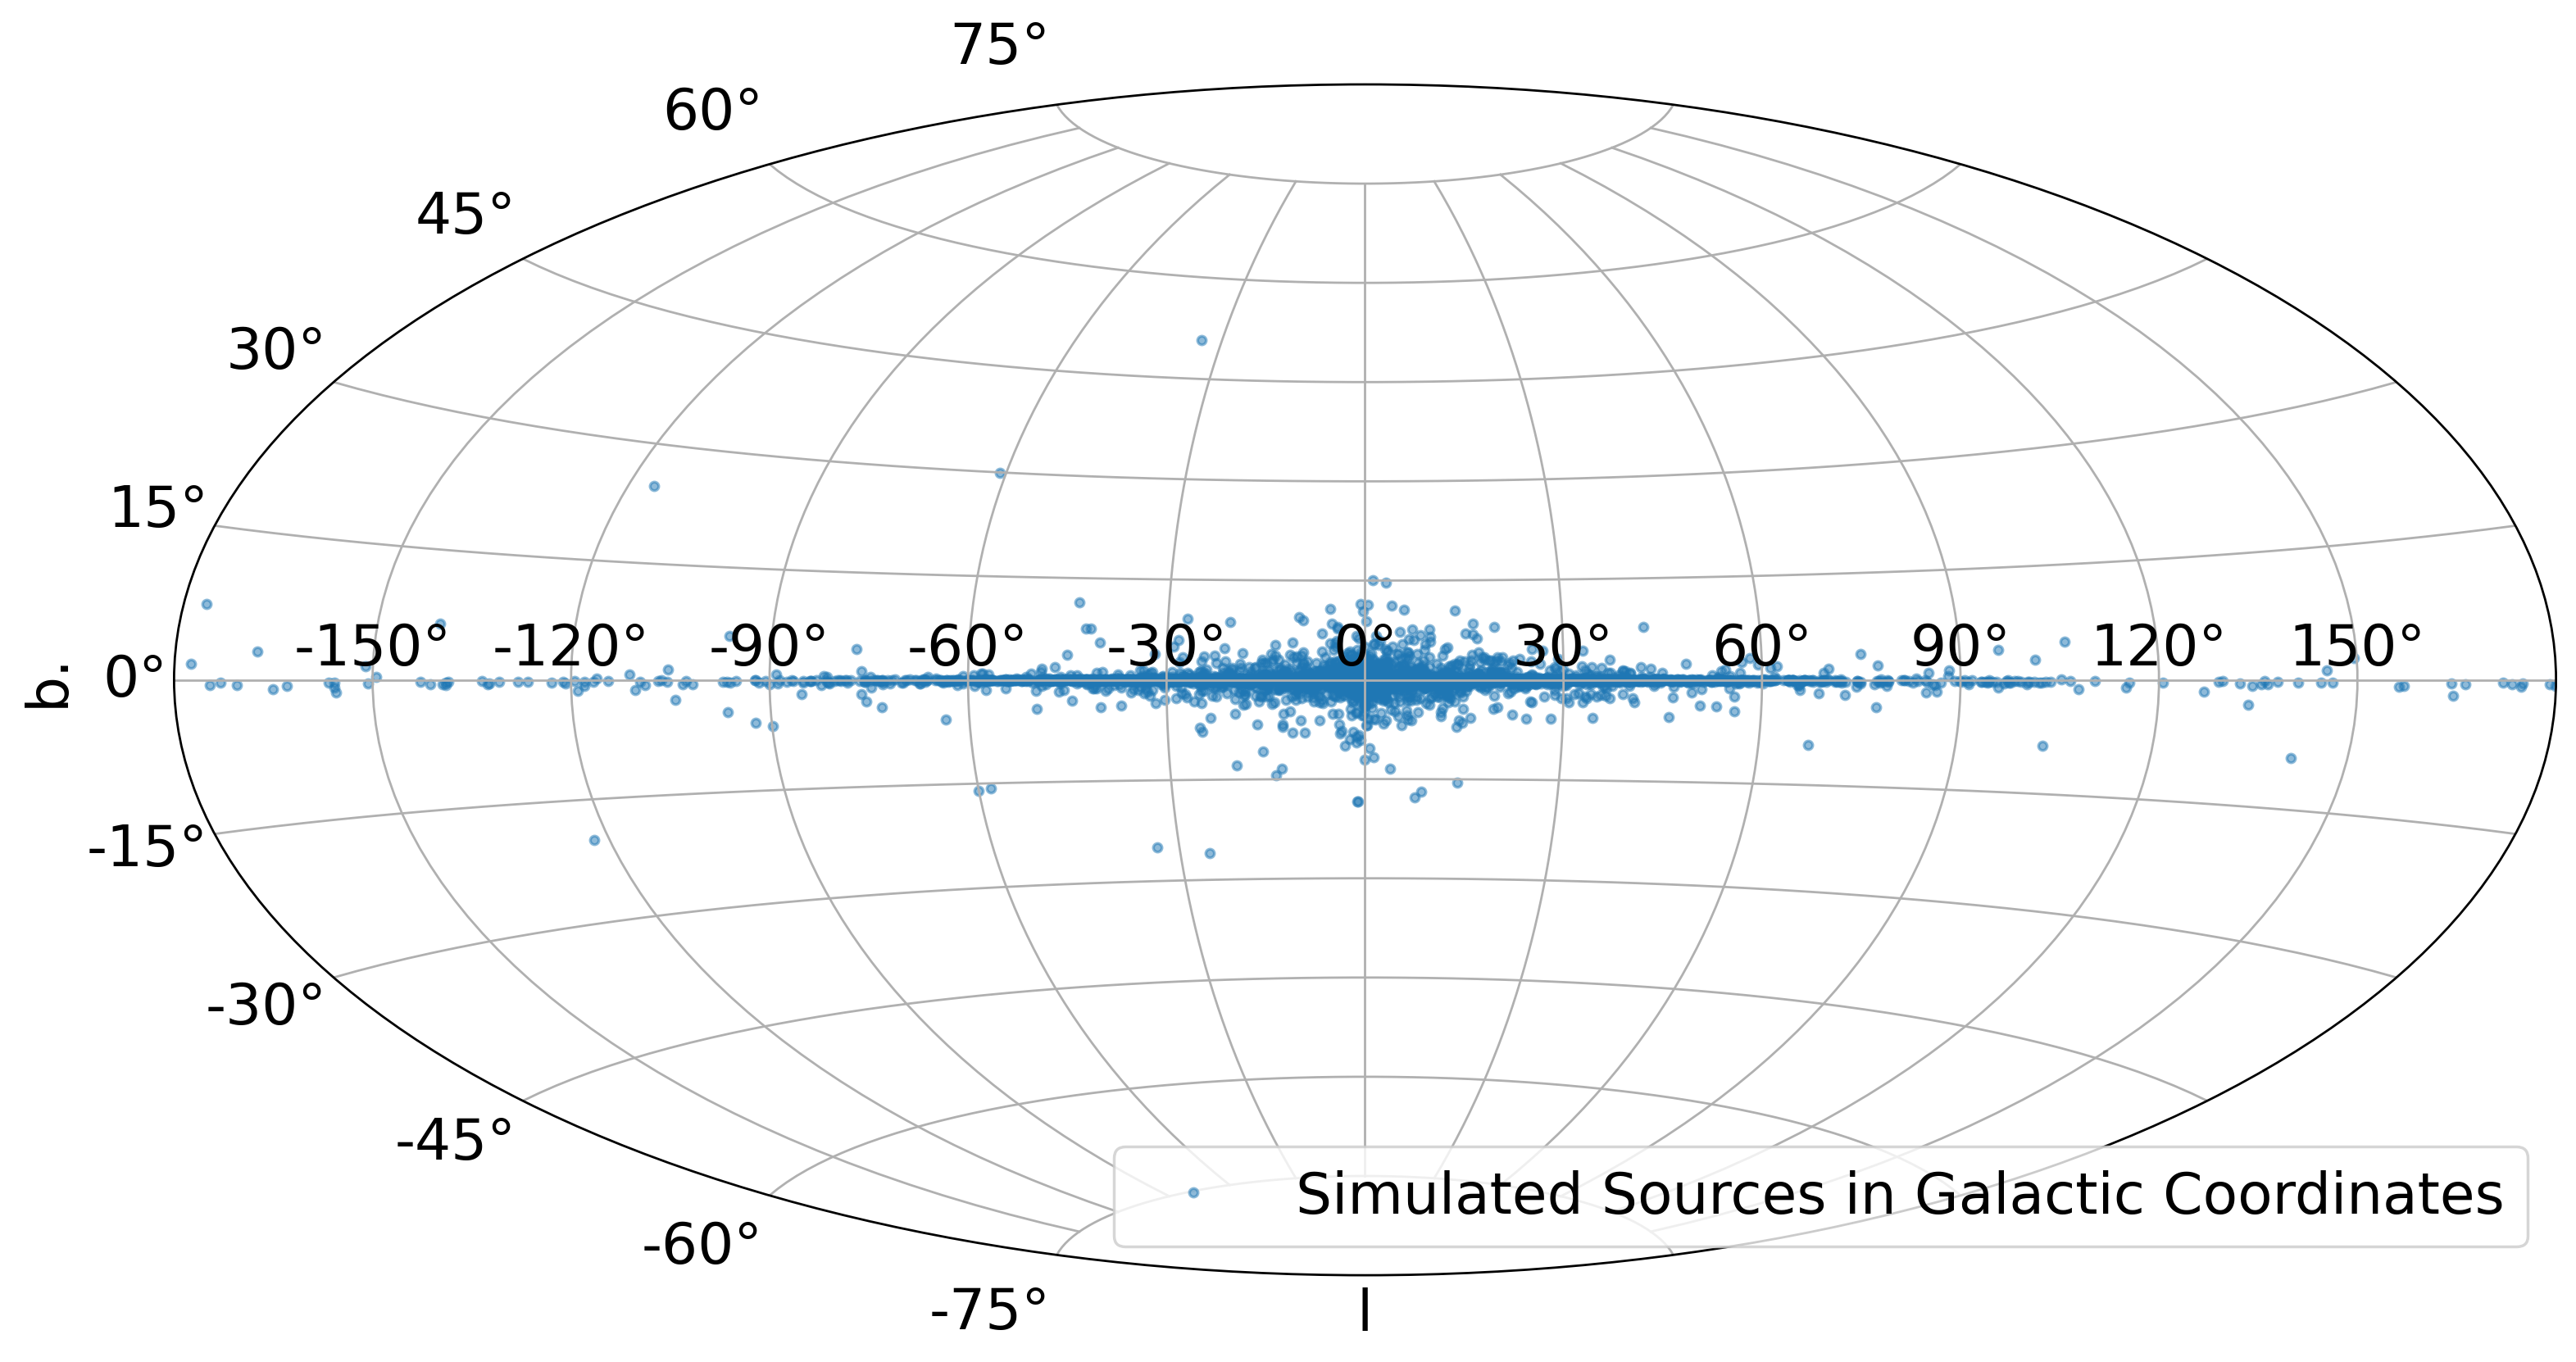

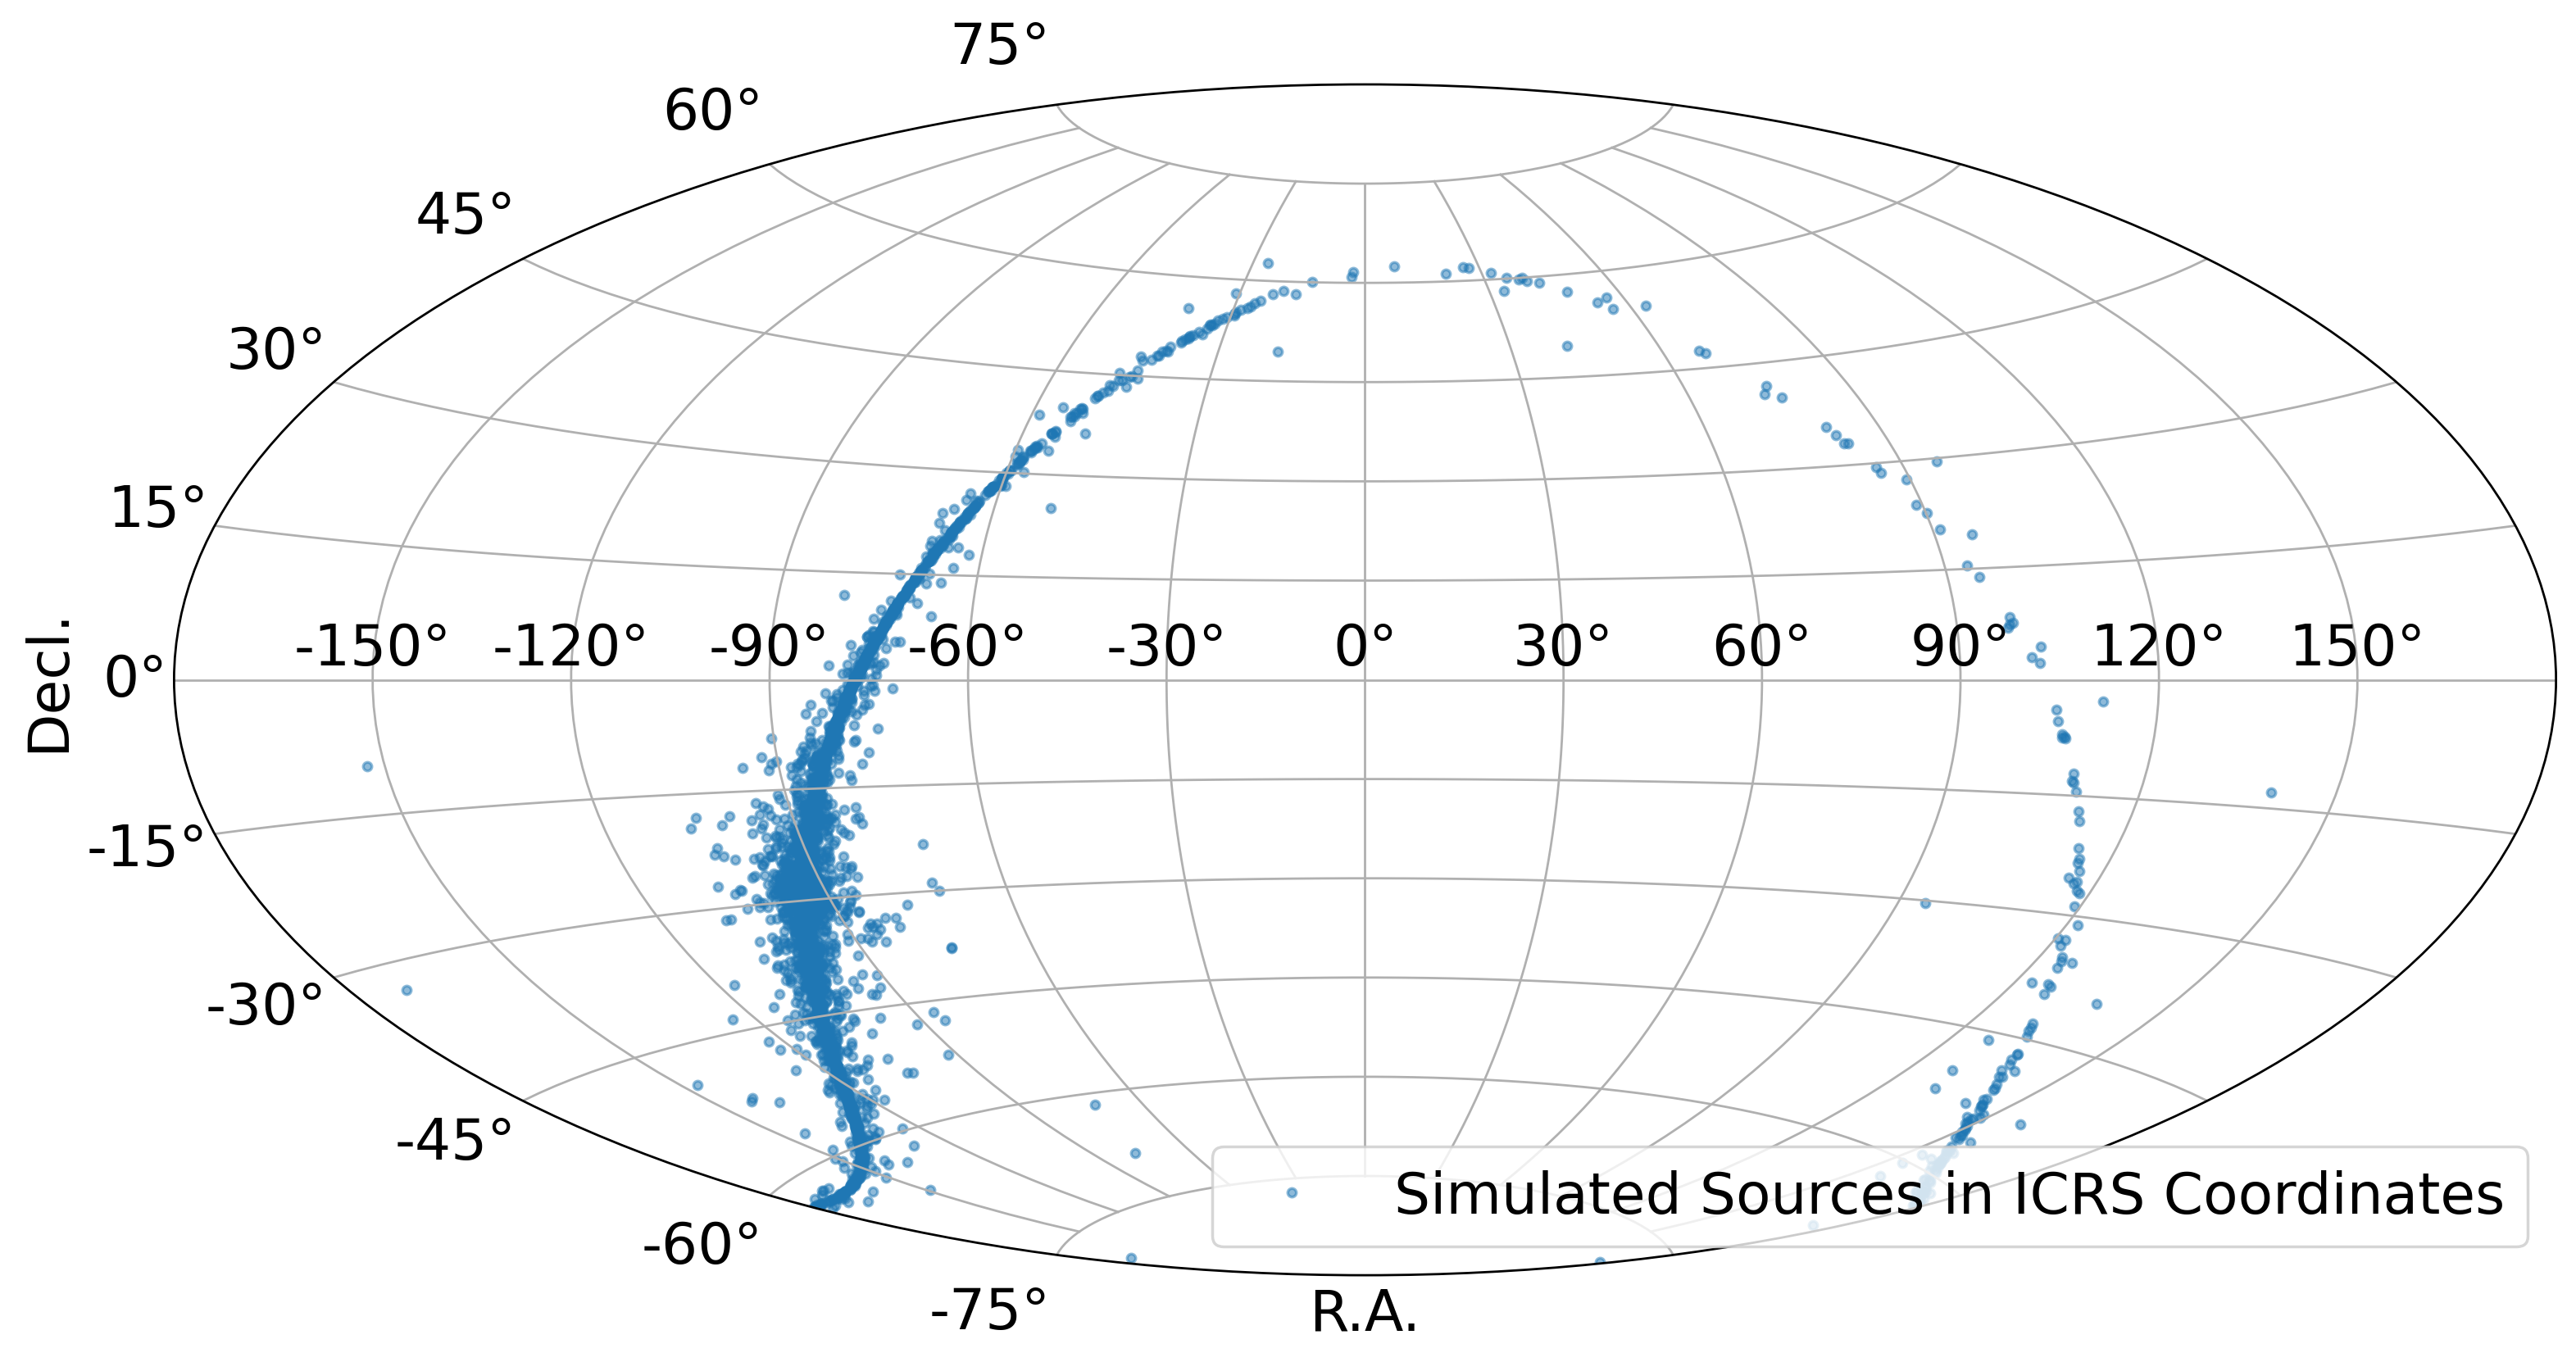

In [2]:
#For now this code will save all the source position plots (2 aitoffs and 1 3d) to the directory given below.
# Have kept "./" for simplicity
# If plots are not required just remove the plt_dir,plot_aitoff_dir_icrs and plot_aitoff_dir_gal lines.

start_time = time.time()

arr=simulate_nu_g.simulate_positions(number_sources_used  = int(1e4),
                                     distribution_model    ="exponential", #"modified_exponential",
                                     # FOLLOWING VALUES CAN BE CHANGED AS DESIRED
                                     #r_min                = 1e-3,
                                     #r_max                = 1e3, 
                                     #z_min                = 1e-6,
                                     #z_max                = 300,
                                     #NOTE GIVING THE FILE LOACTIONS BELOW WILL MAKE PLOTS!
                                     make_pdf_plot_location= "./",
                                     plot_dir             = "./", 
                                     plot_aitoff_dir_icrs = "./",
                                     plot_aitoff_dir_gal  = "./",
                                     output_file          = "./")


print("--- %s seconds ---" %(time.time() - start_time))


In [3]:
# USE SIMULATED DISTANCES TO GIVE FLUX VALUES
arr_with_flux = simulate_nu_g.Get_flux_from_positions(galcentric_coords_r_phi_z   = arr[0],
                                                 method_used               = "StandardCandle",
                                                 diffuse_flux_given    = 2.14e-15
                                                 )

In [4]:
print("Diffuse_flux is 2.14e-15")
print("Simulated Total is ",arr_with_flux[1].sum())
arr_with_flux[-1:]

Diffuse_flux is 2.14e-15
Simulated Total is  3.2891272507861523e-15


[array(1.86558734e+32)]

Text(0.5, 0, 'Flux Values')

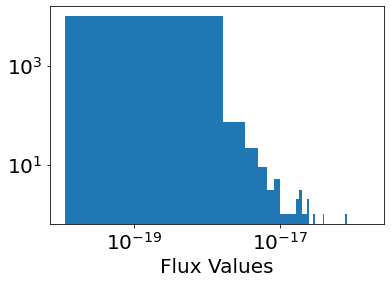

In [5]:
# FLUX HIST
plt.hist(arr_with_flux[1],bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Flux Values")

Text(0.5, 0, 'R (kpc)')

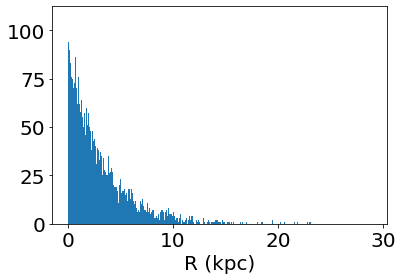

In [6]:
# R HIST
plt.hist(arr[0][0],bins=1000)
plt.xlabel("R (kpc)")

Text(0.5, 0, 'z (kpc)')

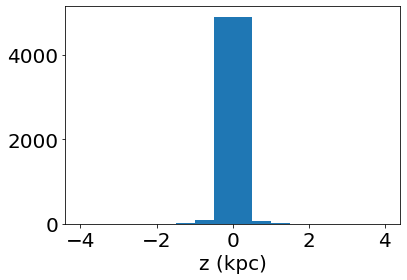

In [7]:
# z HIST
plt.hist(arr[0][1],bins=[-4,-2,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2,4])
plt.xlabel("z (kpc)")